In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop("customerID",axis="columns",inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Total charges is object
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
#since there are some values which contain spaces
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()].shape

(11, 20)

We are having 11 rows which are blank

so out of 7043 rows we will drop 11 rows

In [10]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges);

In [13]:
df1.TotalCharges.dtype

dtype('float64')

Now it is float!

In [14]:
#tenure of Customer who are leaving
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

Plot of customers who are leaving vs not leaving

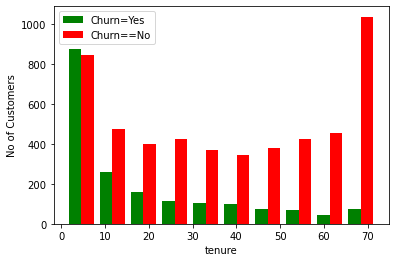

In [16]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=["Churn=Yes","Churn==No"])
plt.xlabel("tenure")
plt.ylabel("No of Customers")
plt.legend();

Customers who are for more years are not leaving the company

To check for Monthly charges

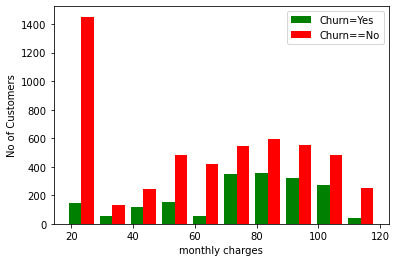

In [17]:
monthly_churn_no=df1[df1.Churn=='No'].MonthlyCharges
monthly_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([monthly_churn_yes,monthly_churn_no],color=['green','red'],label=["Churn=Yes","Churn==No"]);
plt.xlabel("monthly charges")
plt.ylabel("No of Customers")
plt.legend();

We can see for all monthly charges maximum number of customers are leaving

# Replacing categorical values to conitnuous

In [14]:
def unique_column_values(df):
     for column in df:
        if df[column].dtypes=='object':
             print(f'{column}:{df[column].unique()}')

In [15]:
print(unique_column_values(df1))

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
None


In [17]:
#replace no internet service with no
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [18]:
print(unique_column_values(df1))

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
None


In [19]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [20]:
for col in yes_no_columns:
      df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\VEDANG SAWANT\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [24]:
#one hot encoding
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## Scaling the data 

In [26]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

df2[cols_to_scale]=scalar.fit_transform(df2[cols_to_scale])

In [27]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1243,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5762,0,1,1,0,0.408451,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
4217,0,1,1,0,0.183099,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [28]:
x=df2.drop("Churn",axis='columns')
y=df2['Churn']

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [30]:
x_train.shape

(5625, 26)

In [31]:
y_train.shape

(5625,)

In [32]:
x_test.shape

(1407, 26)

In [33]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 693us/step - loss: 0.4730 - accuracy: 0.7668
Epoch 2/100
176/176 [==============================] - 0s 561us/step - loss: 0.4235 - accuracy: 0.7993
Epoch 3/100
176/176 [==============================] - 0s 566us/step - loss: 0.4178 - accuracy: 0.8020
Epoch 4/100
176/176 [==============================] - 0s 546us/step - loss: 0.4142 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 0s 549us/step - loss: 0.4133 - accuracy: 0.8071
Epoch 6/100
176/176 [==============================] - 0s 561us/step - loss: 0.4100 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 510us/step - loss: 0.4085 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 0s 566us/step - loss: 0.4076 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 0s 551us/step - loss: 0.4069 - accuracy: 0.8082
Epoch 10/100
176/176 [==============================] - 0s 541us/step - l

176/176 [==============================] - 0s 576us/step - loss: 0.3605 - accuracy: 0.8297
Epoch 80/100
176/176 [==============================] - 0s 542us/step - loss: 0.3600 - accuracy: 0.8320
Epoch 81/100
176/176 [==============================] - 0s 572us/step - loss: 0.3591 - accuracy: 0.8311
Epoch 82/100
176/176 [==============================] - 0s 591us/step - loss: 0.3583 - accuracy: 0.8327
Epoch 83/100
176/176 [==============================] - 0s 553us/step - loss: 0.3582 - accuracy: 0.8338
Epoch 84/100
176/176 [==============================] - 0s 544us/step - loss: 0.3590 - accuracy: 0.8329
Epoch 85/100
176/176 [==============================] - 0s 534us/step - loss: 0.3580 - accuracy: 0.8338
Epoch 86/100
176/176 [==============================] - 0s 572us/step - loss: 0.3581 - accuracy: 0.8322
Epoch 87/100
176/176 [==============================] - 0s 567us/step - loss: 0.3567 - accuracy: 0.8318
Epoch 88/100
176/176 [==============================] - 0s 572us/step - loss:

In [34]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 542us/step - loss: 0.4852 - accuracy: 0.7825


[0.4852052927017212, 0.7825160026550293]

In [35]:
yp=model.predict(x_test)
yp

array([[0.24576277],
       [0.5935232 ],
       [0.00206813],
       ...,
       [0.7555773 ],
       [0.6686343 ],
       [0.23528054]], dtype=float32)

In [36]:
#coverting to 0& 1
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [37]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [38]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



## Confusion matrix

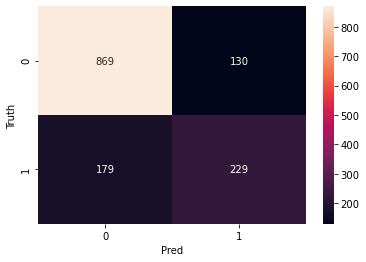

In [84]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Pred')
plt.ylabel('Truth');

Diagonal are correct prediction & off-diagonal are error

# Imbalnced data

## Since we are having f1 scores for both not leaving &  leaving as 0.85 & 0.58 which is not balanced so that's why we can say that our dataset is imbalanced.

### 1.Undersampling of majority class

In [43]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

We are having 999 samples for zeroth class & 408 samples for first class. So, there is an imbalance

In [45]:
#class count
count_class_0, count_class_1=df1.Churn.value_counts()

#divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [48]:
count_class_0,count_class_1

(5163, 1869)

In [46]:
df_class_0.shape,df_class_1.shape

((5163, 27), (1869, 27))

In [55]:
#usndersampling 5163 samples to 1869 samples
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

In [56]:
df_test_under.shape

(3738, 27)

In [58]:
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [62]:
x=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.2,stratify=y)

In [66]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

Model fitting

In [67]:
model=keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
94/94 [==============================] - 0s 606us/step - loss: 0.5763 - accuracy: 0.7241
Epoch 2/100
94/94 [==============================] - 0s 582us/step - loss: 0.5121 - accuracy: 0.7552
Epoch 3/100
94/94 [==============================] - 0s 582us/step - loss: 0.5003 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 610us/step - loss: 0.4921 - accuracy: 0.7602
Epoch 5/100
94/94 [==============================] - 0s 613us/step - loss: 0.4881 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 0s 584us/step - loss: 0.4855 - accuracy: 0.7622
Epoch 7/100
94/94 [==============================] - 0s 604us/step - loss: 0.4824 - accuracy: 0.7629
Epoch 8/100
94/94 [==============================] - 0s 556us/step - loss: 0.4794 - accuracy: 0.7629
Epoch 9/100
94/94 [==============================] - 0s 626us/step - loss: 0.4782 - accuracy: 0.7666
Epoch 10/100
94/94 [==============================] - 0s 633us/step - loss: 0.4755 - accura

94/94 [==============================] - 0s 599us/step - loss: 0.3985 - accuracy: 0.8134
Epoch 82/100
94/94 [==============================] - 0s 512us/step - loss: 0.3971 - accuracy: 0.8151
Epoch 83/100
94/94 [==============================] - 0s 556us/step - loss: 0.3971 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 557us/step - loss: 0.3951 - accuracy: 0.8144
Epoch 85/100
94/94 [==============================] - 0s 576us/step - loss: 0.3943 - accuracy: 0.8140
Epoch 86/100
94/94 [==============================] - 0s 546us/step - loss: 0.3958 - accuracy: 0.8147
Epoch 87/100
94/94 [==============================] - 0s 522us/step - loss: 0.3959 - accuracy: 0.8167
Epoch 88/100
94/94 [==============================] - 0s 589us/step - loss: 0.3929 - accuracy: 0.8157
Epoch 89/100
94/94 [==============================] - 0s 590us/step - loss: 0.3924 - accuracy: 0.8184
Epoch 90/100
94/94 [==============================] - 0s 587us/step - loss: 0.3908 - accuracy: 

In [68]:
yp=model.predict(x_test)
yp

array([[6.14707470e-01],
       [7.58849978e-01],
       [3.15835774e-01],
       [6.17320180e-01],
       [2.34416902e-01],
       [3.87583166e-01],
       [2.16895670e-01],
       [8.61884415e-01],
       [7.99839258e-01],
       [7.53868818e-02],
       [9.35402572e-01],
       [1.40221119e-02],
       [9.75701988e-01],
       [9.93547797e-01],
       [9.75149989e-01],
       [9.53519702e-01],
       [9.04387236e-01],
       [8.35075915e-01],
       [9.78761733e-01],
       [2.87574410e-01],
       [5.07422328e-01],
       [8.19135189e-01],
       [4.42704141e-01],
       [1.19466782e-02],
       [1.60398334e-01],
       [9.08080697e-01],
       [8.25588405e-02],
       [7.78651476e-01],
       [4.11382347e-01],
       [9.15220559e-01],
       [9.54957306e-01],
       [1.08848602e-01],
       [9.64259982e-01],
       [9.60722268e-01],
       [7.28915274e-01],
       [4.91901398e-01],
       [9.42701340e-01],
       [7.30127871e-01],
       [9.36049759e-01],
       [7.74715841e-02],


In [69]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       374
           1       0.73      0.81      0.77       374

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748



We can see our f1 score is now almost same 0.74 & 0.77. So, our data & model is almost balanced.

## 2. Oversampling minority class

In [72]:
count_class_0, count_class_1

(5163, 1869)

In [81]:
#Oversampling 1869 to 5163 samples by using argument replace=True in sample function
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(5163, 27)

In [85]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(10326, 27)

In [86]:
df_test_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [89]:
x=df_test_over.drop('Churn',axis=1)
y=df_test_over['Churn']


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.2,stratify=y)

In [91]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
259/259 [==============================] - 0s 605us/step - loss: 0.5496 - accuracy: 0.7264
Epoch 2/100
259/259 [==============================] - 0s 584us/step - loss: 0.4890 - accuracy: 0.7651
Epoch 3/100
259/259 [==============================] - 0s 532us/step - loss: 0.4799 - accuracy: 0.7689
Epoch 4/100
259/259 [==============================] - 0s 592us/step - loss: 0.4749 - accuracy: 0.7713
Epoch 5/100
259/259 [==============================] - 0s 602us/step - loss: 0.4724 - accuracy: 0.7763
Epoch 6/100
259/259 [==============================] - 0s 582us/step - loss: 0.4681 - accuracy: 0.7776
Epoch 7/100
259/259 [==============================] - 0s 644us/step - loss: 0.4653 - accuracy: 0.7810
Epoch 8/100
259/259 [==============================] - 0s 568us/step - loss: 0.4625 - accuracy: 0.7809
Epoch 9/100
259/259 [==============================] - 0s 509us/step - loss: 0.4602 - accuracy: 0.7822
Epoch 10/100
259/259 [==============================] - 0s 529us/step - l

259/259 [==============================] - 0s 572us/step - loss: 0.3727 - accuracy: 0.8316
Epoch 80/100
259/259 [==============================] - 0s 594us/step - loss: 0.3735 - accuracy: 0.8323
Epoch 81/100
259/259 [==============================] - 0s 547us/step - loss: 0.3719 - accuracy: 0.8345
Epoch 82/100
259/259 [==============================] - 0s 575us/step - loss: 0.3717 - accuracy: 0.8324
Epoch 83/100
259/259 [==============================] - 0s 541us/step - loss: 0.3695 - accuracy: 0.8321
Epoch 84/100
259/259 [==============================] - 0s 562us/step - loss: 0.3688 - accuracy: 0.8349
Epoch 85/100
259/259 [==============================] - 0s 532us/step - loss: 0.3691 - accuracy: 0.8350
Epoch 86/100
259/259 [==============================] - 0s 539us/step - loss: 0.3682 - accuracy: 0.8356
Epoch 87/100
259/259 [==============================] - 0s 555us/step - loss: 0.3672 - accuracy: 0.8350
Epoch 88/100
259/259 [==============================] - 0s 530us/step - loss:

In [95]:
yp=model.predict(x_test)

In [96]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [97]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1033
           1       0.75      0.85      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066



We can see our f1 score is now almost same 0.76 & 0.79. So, our data & model is almost balanced.

## 3.SMOTE

In [107]:
from imblearn.over_sampling import SMOTE


In [108]:
x=df2.drop('Churn',axis=1)
y=df2['Churn']

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [115]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

(10326, 26)

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=15,test_size=0.2,stratify=y_sm)

In [117]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
259/259 [==============================] - 0s 580us/step - loss: 0.5527 - accuracy: 0.7167
Epoch 2/100
259/259 [==============================] - 0s 515us/step - loss: 0.4662 - accuracy: 0.7794
Epoch 3/100
259/259 [==============================] - 0s 539us/step - loss: 0.4562 - accuracy: 0.7855
Epoch 4/100
259/259 [==============================] - 0s 591us/step - loss: 0.4501 - accuracy: 0.7885
Epoch 5/100
259/259 [==============================] - 0s 591us/step - loss: 0.4457 - accuracy: 0.7926
Epoch 6/100
259/259 [==============================] - 0s 551us/step - loss: 0.4413 - accuracy: 0.7931
Epoch 7/100
259/259 [==============================] - 0s 548us/step - loss: 0.4368 - accuracy: 0.7977
Epoch 8/100
259/259 [==============================] - 0s 528us/step - loss: 0.4346 - accuracy: 0.7996
Epoch 9/100
259/259 [==============================] - 0s 569us/step - loss: 0.4304 - accuracy: 0.8006
Epoch 10/100
259/259 [==============================] - 0s 523us/step - l

259/259 [==============================] - 0s 538us/step - loss: 0.3471 - accuracy: 0.8462
Epoch 80/100
259/259 [==============================] - 0s 538us/step - loss: 0.3484 - accuracy: 0.8450
Epoch 81/100
259/259 [==============================] - 0s 513us/step - loss: 0.3485 - accuracy: 0.8471
Epoch 82/100
259/259 [==============================] - 0s 528us/step - loss: 0.3454 - accuracy: 0.8483
Epoch 83/100
259/259 [==============================] - 0s 529us/step - loss: 0.3461 - accuracy: 0.8492
Epoch 84/100
259/259 [==============================] - 0s 534us/step - loss: 0.3460 - accuracy: 0.8481
Epoch 85/100
259/259 [==============================] - 0s 522us/step - loss: 0.3456 - accuracy: 0.8499
Epoch 86/100
259/259 [==============================] - 0s 552us/step - loss: 0.3424 - accuracy: 0.8496
Epoch 87/100
259/259 [==============================] - 0s 535us/step - loss: 0.3430 - accuracy: 0.8515
Epoch 88/100
259/259 [==============================] - 0s 530us/step - loss:

In [118]:
yp=model.predict(x_test)

y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [119]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1033
           1       0.78      0.82      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



We can see our f1 score is now almost same 0.79 & 0.80. So, our data & model is almost balanced.

## 4.Ensemble

In [120]:
x=df2.drop('Churn',axis=1)
y=df2['Churn']

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=0.2,stratify=y)

y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [123]:
4130/3

1376.6666666666667

In [126]:
df3=x_train.copy()
df3['Churn']=y_train

In [127]:
df3_class_0=df3[df3.Churn==0]
df3_class_1=df3[df3.Churn==1]

In [129]:
df3_class_0.shape,df3_class_1.shape

((4130, 27), (1495, 27))

In [142]:
def get_train_batch(start,end,df_majority,df_minority):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    
    x_train=df_train.drop('Churn',axis=1)
    y_train=df_train['Churn']
    
    return x_train,y_train

In [143]:
x_train,y_train=get_train_batch(0,1495,df3_class_0,df3_class_1)

In [144]:
x_train.shape

(2990, 26)

### Model 1

In [145]:
model1=model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
94/94 [==============================] - 0s 642us/step - loss: 0.6175 - accuracy: 0.6632
Epoch 2/100
94/94 [==============================] - 0s 656us/step - loss: 0.5136 - accuracy: 0.7572
Epoch 3/100
94/94 [==============================] - 0s 545us/step - loss: 0.4983 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 515us/step - loss: 0.4911 - accuracy: 0.7686
Epoch 5/100
94/94 [==============================] - 0s 506us/step - loss: 0.4875 - accuracy: 0.7729
Epoch 6/100
94/94 [==============================] - 0s 605us/step - loss: 0.4844 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 0s 574us/step - loss: 0.4842 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 592us/step - loss: 0.4818 - accuracy: 0.7763
Epoch 9/100
94/94 [==============================] - 0s 575us/step - loss: 0.4780 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 575us/step - loss: 0.4767 - accura

94/94 [==============================] - 0s 533us/step - loss: 0.3980 - accuracy: 0.8207
Epoch 82/100
94/94 [==============================] - 0s 529us/step - loss: 0.3974 - accuracy: 0.8214
Epoch 83/100
94/94 [==============================] - 0s 552us/step - loss: 0.3985 - accuracy: 0.8154
Epoch 84/100
94/94 [==============================] - 0s 558us/step - loss: 0.3975 - accuracy: 0.8197
Epoch 85/100
94/94 [==============================] - 0s 537us/step - loss: 0.3959 - accuracy: 0.8167
Epoch 86/100
94/94 [==============================] - 0s 493us/step - loss: 0.3970 - accuracy: 0.8204
Epoch 87/100
94/94 [==============================] - 0s 533us/step - loss: 0.3938 - accuracy: 0.8217
Epoch 88/100
94/94 [==============================] - 0s 448us/step - loss: 0.3921 - accuracy: 0.8224
Epoch 89/100
94/94 [==============================] - 0s 570us/step - loss: 0.3961 - accuracy: 0.8224
Epoch 90/100
94/94 [==============================] - 0s 532us/step - loss: 0.3937 - accuracy: 

In [151]:
yp=model1.predict(x_test)

y_pred1=[]
for element in yp:
    if element>0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [152]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.49      0.75      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.78      0.73      0.74      1407



### Model 2

In [153]:
x_train,y_train=get_train_batch(1495,2990,df3_class_0,df3_class_1)

In [154]:
x_train.shape

(2990, 26)

In [159]:
model2=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
83/83 [==============================] - 0s 657us/step - loss: 0.4593 - accuracy: 0.7970
Epoch 2/100
83/83 [==============================] - 0s 591us/step - loss: 0.4399 - accuracy: 0.8068
Epoch 3/100
83/83 [==============================] - 0s 567us/step - loss: 0.4344 - accuracy: 0.8027
Epoch 4/100
83/83 [==============================] - 0s 567us/step - loss: 0.4293 - accuracy: 0.8023
Epoch 5/100
83/83 [==============================] - 0s 526us/step - loss: 0.4246 - accuracy: 0.8080
Epoch 6/100
83/83 [==============================] - 0s 643us/step - loss: 0.4212 - accuracy: 0.8095
Epoch 7/100
83/83 [==============================] - 0s 635us/step - loss: 0.4197 - accuracy: 0.8087
Epoch 8/100
83/83 [==============================] - 0s 571us/step - loss: 0.4191 - accuracy: 0.8046
Epoch 9/100
83/83 [==============================] - 0s 577us/step - loss: 0.4125 - accuracy: 0.8095
Epoch 10/100
83/83 [==============================] - 0s 576us/step - loss: 0.4121 - accura

83/83 [==============================] - 0s 660us/step - loss: 0.3430 - accuracy: 0.8493
Epoch 82/100
83/83 [==============================] - 0s 569us/step - loss: 0.3450 - accuracy: 0.8497
Epoch 83/100
83/83 [==============================] - 0s 579us/step - loss: 0.3446 - accuracy: 0.8509
Epoch 84/100
83/83 [==============================] - 0s 567us/step - loss: 0.3434 - accuracy: 0.8512
Epoch 85/100
83/83 [==============================] - 0s 533us/step - loss: 0.3396 - accuracy: 0.8524
Epoch 86/100
83/83 [==============================] - 0s 538us/step - loss: 0.3405 - accuracy: 0.8520
Epoch 87/100
83/83 [==============================] - 0s 576us/step - loss: 0.3410 - accuracy: 0.8512
Epoch 88/100
83/83 [==============================] - 0s 565us/step - loss: 0.3390 - accuracy: 0.8501
Epoch 89/100
83/83 [==============================] - 0s 559us/step - loss: 0.3392 - accuracy: 0.8546
Epoch 90/100
83/83 [==============================] - 0s 575us/step - loss: 0.3366 - accuracy: 

In [160]:
yp=model2.predict(x_test)

y_pred2=[]
for element in yp:
    if element>0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [161]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.56      0.68      1033
           1       0.37      0.72      0.49       374

    accuracy                           0.60      1407
   macro avg       0.61      0.64      0.58      1407
weighted avg       0.72      0.60      0.63      1407



### Model 3

In [158]:
x_train,y_train=get_train_batch(2990,4130,df3_class_0,df3_class_1)
x_train.shape

(2635, 26)

In [162]:
model3=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
83/83 [==============================] - 0s 574us/step - loss: 0.3363 - accuracy: 0.8528
Epoch 2/100
83/83 [==============================] - 0s 656us/step - loss: 0.3287 - accuracy: 0.8543
Epoch 3/100
83/83 [==============================] - 0s 597us/step - loss: 0.3294 - accuracy: 0.8622
Epoch 4/100
83/83 [==============================] - 0s 548us/step - loss: 0.3294 - accuracy: 0.8562
Epoch 5/100
83/83 [==============================] - 0s 490us/step - loss: 0.3303 - accuracy: 0.8520
Epoch 6/100
83/83 [==============================] - 0s 609us/step - loss: 0.3285 - accuracy: 0.8569
Epoch 7/100
83/83 [==============================] - 0s 699us/step - loss: 0.3298 - accuracy: 0.8603
Epoch 8/100
83/83 [==============================] - 0s 608us/step - loss: 0.3280 - accuracy: 0.8626
Epoch 9/100
83/83 [==============================] - 0s 594us/step - loss: 0.3305 - accuracy: 0.8554
Epoch 10/100
83/83 [==============================] - 0s 560us/step - loss: 0.3249 - accura

83/83 [==============================] - 0s 505us/step - loss: 0.2933 - accuracy: 0.8706
Epoch 82/100
83/83 [==============================] - 0s 567us/step - loss: 0.2923 - accuracy: 0.8702
Epoch 83/100
83/83 [==============================] - 0s 582us/step - loss: 0.2960 - accuracy: 0.8748
Epoch 84/100
83/83 [==============================] - 0s 579us/step - loss: 0.2926 - accuracy: 0.8721
Epoch 85/100
83/83 [==============================] - 0s 578us/step - loss: 0.2960 - accuracy: 0.8702
Epoch 86/100
83/83 [==============================] - 0s 535us/step - loss: 0.2969 - accuracy: 0.8683
Epoch 87/100
83/83 [==============================] - 0s 554us/step - loss: 0.2926 - accuracy: 0.8672
Epoch 88/100
83/83 [==============================] - 0s 598us/step - loss: 0.2933 - accuracy: 0.8710
Epoch 89/100
83/83 [==============================] - 0s 584us/step - loss: 0.2906 - accuracy: 0.8702
Epoch 90/100
83/83 [==============================] - 0s 596us/step - loss: 0.2886 - accuracy: 

In [163]:
yp=model3.predict(x_test)

y_pred3=[]
for element in yp:
    if element>0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

In [164]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.68      0.27      0.39      1033
           1       0.24      0.64      0.35       374

    accuracy                           0.37      1407
   macro avg       0.46      0.46      0.37      1407
weighted avg       0.56      0.37      0.38      1407



### When you get 2 or 3 your majority vote is 1 & when you get 0&1 your majority vote is zero
#### Vote1+vote2+vote3=0 or 1 or 2 or 3
#### where vote can take value 0 or 1

In [167]:
len(y_pred3)

1407

In [172]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [174]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.88      0.55      0.68      1033
           1       0.39      0.80      0.52       374

    accuracy                           0.61      1407
   macro avg       0.64      0.67      0.60      1407
weighted avg       0.75      0.61      0.64      1407

